In [1]:
import pandas as pd 
import numpy as np 

# Statistical Inference - Employee Burn Out and WFH 
Use statistical techniques learned to answer a question about a population. The population could be students, people in a country, employees etc. E.g., does this new curriculum improve student’s reading skills? 
Analyze your results and summarize 



1. One Sample Mean 
- Confidence Interval: Estimate the population mean given a random sample 
- Hypothesis Testing: Does the random sample mean differ (greater or lower than) from the population mean 

2. One Sample Proportion 
- Confidence Interval: Estimate the population proportion given a random sample 
- Hypthesis Testing: Does the random sample proportion differ (greater or lower than) from the population proportion?

3. Two Independend Means 
- Confidence Interval: Estimate the population difference in means given a random sample (n1 and n2 greater than 30) 
- Hypothesis Testing: Does the random sample mean difference differ (greater or lower than) the hypothesized population mean difference (0)?

4. Two Independend Proportions  
- Confidence Interval: Estimate the population proportion given a random sample (at least 10 successes and 10 failures) 
- Hypothesis Testing: Does the random sample proportion difference differ (greater or lower than) the hypothesized population proportion difference (0)?

5. Paired Means 
- Confidence Interval: Estimate the population mean change given a random sample 
- Hypothesis Testing: Does the random sample mean change differ from the population mean change? 

We will use a dataset about Employee Burn Out Rate from kaggle https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out/data

    Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
    Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
    Gender: The gender of the employee (Male/Female)
    Company Type: The type of company where the employee is working (Service/Product)
    WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
    Designation: The designation of the employee of work in the organization.
    In the range of [0.0, 5.0] bigger is higher designation.
    Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
    In the range of [1.0, 10.0] (higher means more resource)
    Mental Fatigue Score: The level of fatigue mentally the employee is facing.
    In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
    Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
    In the range of [0.0, 1.0] where the higher the value is more is the burn out.


In [215]:
df = pd.concat([pd.read_csv('burnout_train.csv'),pd.read_csv('burnout_test.csv')])

In [216]:
df = df.dropna()

In [476]:
#Let's looks at the population of employees at "service" companies 
df_all = df.loc[df['Company Type']=='Service']

In [477]:
df_all.shape

(12174, 9)

In [478]:
df_all.sample(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
4174,fffe31003300340036003600,2008-02-27,Female,Service,Yes,2.0,3.0,6.5,0.45
10858,fffe33003100380035003300,2008-11-04,Male,Service,No,2.0,4.0,4.9,0.25
16093,fffe32003900310033003700,2008-07-15,Male,Service,No,2.0,3.0,3.8,0.33
2354,fffe31003700300037003600,2008-04-17,Female,Service,Yes,0.0,1.0,0.5,0.05
20284,fffe31003600340033003700,2008-08-05,Female,Service,Yes,1.0,4.0,7.0,0.48
20361,fffe3100320036003000,2008-02-11,Female,Service,No,3.0,5.0,7.7,0.68
22295,fffe32003800320032003100,2008-02-20,Female,Service,No,2.0,4.0,7.6,0.55
16446,fffe3200310032003600,2008-03-24,Female,Service,Yes,2.0,5.0,4.9,0.41
13505,fffe32003600340038003000,2008-02-19,Female,Service,No,1.0,4.0,5.0,0.40
9137,fffe31003500380036003600,2008-02-07,Female,Service,No,2.0,6.0,9.0,0.76


# 1. One Sample Mean 

In [242]:
#Population Mean Burn Rate - 12,174 employees 
pop_burn_rate = df_all['Burn Rate'].mean()
pop_fatigue = df_all['Mental Fatigue Score'].mean()
print(f'Mean Burn Rate (out of 1.0) in the population of 12k employees: {pop_burn_rate}')
print(f'Mean Fatigue score (out of 10) in the population of 12k employees: {pop_fatigue}')

Mean Burn Rate (out of 1.0) in the population of 12k employees: 0.45329226219812724
Mean Fatigue score (out of 10) in the population of 12k employees: 5.738721866272384


### Sample size for mean estimation 

In [282]:
#Sample Size calculation - Estimating MEAN metrics for employees. 

#If the population is 12,174 employees, what is a sufficient sample size to estimate sample means
#For 95% confidence and 5% margin of error?

est_pop_std_br = (((df_all['Burn Rate']-df_all['Burn Rate'].mean())**2).mean())**(.5)
est_pop_std_fat = (((df_all['Mental Fatigue Score']-df_all['Mental Fatigue Score'].mean())**2).mean())**(.5)

print(f'estimated population standard deviation for burn rate: {est_pop_std_br}')
print(f'estimated population standard deviation for fatigue: {est_pop_std_fat}')

#Sample size N for confidence interval 95% (z = 1.96) and Margin of Error of 2% (0.02)
def calc_n_mean(z=1.96,sigma=1,M=.05):
    n = ((z*sigma)/M)**2 
    return n 

print(f'min sample size to calculate mean burn rate: {calc_n_mean(z=1.96,sigma=est_pop_std_br,M=0.05)}')
print(f'min sample size to calculate mean fatigue score: {calc_n_mean(z=1.96,sigma=est_pop_std_fat,M=0.05)}')

print('\n')
print('In conclusion, we will take a random sample of 5,700 employees for the mean calculations')

estimated population standard deviation for burn rate: 0.19744953503886128
estimated population standard deviation for fatigue: 1.9197469875374102
min sample size to calculate mean burn rate: 59.907937054615736
min sample size to calculate mean fatigue score: 5663.176844337708


In conclusion, we will take a random sample of 5,700 employees for the mean calculations


In [265]:
#Generate random sample for mean estimates 
df_sample_1 = df_all.sample(5700)

#The samples are close to normal 
#df_sample_1['Burn Rate'].hist()
#df_sample_1['Mental Fatigue Score'].hist()

### Estimate population mean given a random sample (confidence intervals)

In [286]:
#Sample statistic -- sample mean burn rate and fatigue scores, calclated with 95% confidence intervals 
sample_burn_rate = df_sample_1['Burn Rate'].mean()
sample_fatigue = df_sample_1['Mental Fatigue Score'].mean()

n = 5700
dof = n-1 
tstat = 1.96 

def calc_sample_std(col):
    return (((col-col.mean())**2).mean())**0.5 

def calc_MOE(col,n,tstat):
    return tstat *(calc_sample_std(col)/(n**.5))
    
sample_burn_rate_MOE = calc_MOE(df_sample_1['Burn Rate'],n,t)
sample_fatigue_MOE = calc_MOE(df_sample_1['Mental Fatigue Score'],n,t)

print(f'Mean Burn Rate (out of 1.0) in the sample of 5.7k employees: {round(sample_burn_rate,5)} +/- {sample_burn_rate_MOE}')
print(f'95% Confidence Interval for sample mean Burn Rate: [{round(sample_burn_rate-sample_burn_rate_MOE,5)},{round(sample_burn_rate+sample_burn_rate_MOE,5)}]')
print(f'Population Mean Burn Rate: {round(pop_burn_rate,5)}')

print('\n')
print(f'Mean Fatigue score (out of 10) in the population of 5.7k employees: {round(sample_fatigue,5)} +/- {sample_fatigue_MOE}')
print(f'95% Confidence Interval for sample mean fatigue score: [{round(sample_fatigue-sample_fatigue_MOE,5)},{round(sample_fatigue+sample_fatigue_MOE,5)}]')
print(f'Population Mean Burn Rate: {round(pop_fatigue,5)}')


Mean Burn Rate (out of 1.0) in the sample of 5.7k employees: 0.45167 +/- -0.0016220867595307384
95% Confidence Interval for sample mean Burn Rate: [0.45329,0.45005]
Population Mean Burn Rate: 0.45329


Mean Fatigue score (out of 10) in the population of 5.7k employees: 5.72754 +/- -0.01570409920134166
95% Confidence Interval for sample mean fatigue score: [5.74325,5.71184]
Population Mean Burn Rate: 5.73872


### Does the random sample mean differ from the population mean? (hypothesis testing) 

In [339]:
from scipy.stats import t 

def calc_tstat(sample_mean, pop_mean, sample_std, n):
    return (sample_mean-pop_mean)/(sample_std/(n**.5))

def calc_p(tstat,n):
    dof = n-1 
    # p-value for 2-sided test
    return 2*(t.cdf(t_stat, dof))
    

In [367]:
tstat = calc_tstat(sample_burn_rate, pop_burn_rate, calc_sample_std(df_sample_1['Burn Rate']),5700)
tstat

-0.6226722466850327

In [364]:
p = 2*(t.cdf(t_stat, 5700-1))
p

0.9862550752534358

In [365]:
print(f'Since p-value 0.99>0.05 we fail to reject the null hypothesis that the sample mean burn rate \
      {round(sample_burn_rate,5)} \n differs from the population mean burn rate {round(pop_burn_rate,5)}')

Since p-value 0.99>0.05 we fail to reject the null hypothesis that the sample mean burn rate       0.45167 
 differs from the population mean burn rate 0.45329


In [366]:
df_sample_no_wfh = df_all.loc[df_all['WFH Setup Available']=='No']
df_sample_no_wfh

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,High_BR,High_Fatigue
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,0,0
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,0,0
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62,0,1
17,fffe31003500350030003400,2008-03-28,Male,Service,No,3.0,6.0,6.7,0.59,0,0
26,fffe3200340036003400,2008-10-11,Male,Service,No,2.0,4.0,6.6,0.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22718,fffe3500330039003900,2008-07-15,Female,Service,No,1.0,2.0,4.6,0.34,0,0
22732,fffe31003300320030003800,2008-12-21,Female,Service,No,2.0,4.0,6.3,0.39,0,0
22735,fffe3400320037003000,2008-07-26,Male,Service,No,3.0,7.0,7.3,0.64,0,0
22739,fffe32003300350034003100,2008-02-06,Male,Service,No,2.0,5.0,8.5,0.67,0,1


### If the "random sample" is now the subset of employees without a wfh setup available, is the mean burnout rate higher than the population mean? right-tailed hypothesis test 

In [370]:
df_sample_no_wfh['Burn Rate'].mean()

0.5173275093599572

In [371]:
pop_burn_rate

0.45329226219812724

In [368]:
tstat_no_wfh = calc_tstat(df_sample_no_wfh['Burn Rate'].mean(), pop_burn_rate, calc_sample_std(df_sample_wfh['Burn Rate']),5609)
tstat_no_wfh

24.452181729116468

In [369]:
from scipy.stats import t 
# p-value for 1-sided test
p = 1*(t.cdf(tstat_no_wfh, 5609-1))
p

1.0

In [373]:
print(f'Since p-value = 1 we fail to reject the null hypothesis that the sample mean burnout rate differs from the population rate 0.45')

Since p-value = 1 we fail to reject the null hypothesis that the sample mean burnout rate differs from the population rate 0.45


# 2. One Sample Proportion 

In [375]:
#Population Proportion Burn Rate/Fatigue with a high rating - 12,174 employees 
#Define "high" as greater than or equal to .75 burn rate and greater than or equal to 7.5 fatigue score 
df_all.loc[:,'High_BR'] = (df_all['Burn Rate']>=.75).astype(int)
df_all.loc[:,'High_Fatigue'] = (df_all['Mental Fatigue Score']>=7.5).astype(int)

In [376]:
pop_prop_burn_rate = df_all['High_BR'].mean()
pop_prop_fatigue = df_all['High_Fatigue'].mean()
print(f'Proportion of High Burn Rate in the population of 12k employees: {pop_prop_burn_rate}')
print(f'Proportion of High Fatigue score in the population of 12k employees: {pop_prop_fatigue}')

Proportion of High Burn Rate in the population of 12k employees: 0.07162805979957286
Proportion of High Fatigue score in the population of 12k employees: 0.18572367340233284


### Sample size for proportion estimation 

In [380]:
p = 0.5
z = 1.96
E = 0.05 

n = (z/E)**2*(p*(1-p))
n
print(f'We will take a sample size of 500 since n=384')

We will take a sample size of 500 since n=384


In [385]:
df_sample_2 = df_all.sample(500)

### Estimate population proportion given a random sample (confidence intervals)

In [388]:
#Check that there are at least 10 successes and 10 failures 
df_sample_2['High_BR'].value_counts()

0    467
1     33
Name: High_BR, dtype: int64

In [389]:
df_sample_2['High_Fatigue'].value_counts()

0    402
1     98
Name: High_Fatigue, dtype: int64

In [394]:
sample_prop_burn_rate = df_sample_2['High_BR'].mean()
sample_prop_fatigue = df_sample_2['High_Fatigue'].mean()

def calc_prop_MOE(sample_prop,n,z):
    return z*(sample_prop*(1-sample_prop)/n)**0.5


sample_prop_burn_rate_MOE = calc_prop_MOE(sample_prop_burn_rate,n=500,z=1.96)
sample_prop_fatigue_MOE = calc_prop_MOE(sample_prop_fatigue,n=500,z=1.96)

print(f'Proportion of High Burn Rate in the sample of 500 employees: {round(sample_prop_burn_rate,5)}+/- {round(sample_prop_burn_rate_MOE,5)}')
print(f'95% Confidence Interval for sample proportion with High BR: [{round(sample_prop_burn_rate-sample_prop_burn_rate_MOE,5)},{round(sample_prop_burn_rate+sample_prop_burn_rate_MOE,5)}]')
print(f'Population Proportion with High Burn Rate: {round(pop_prop_burn_rate,5)}')

print('\n')
print(f'Proportion of High Fatigue score in the sample of 500 employees: {round(sample_prop_fatigue,5)}+/- {round(sample_prop_fatigue_MOE,5)}')
print(f'95% Confidence Interval for sample proportion with High BR: [{round(sample_prop_fatigue-sample_prop_fatigue_MOE,5)},{round(sample_prop_fatigue+sample_prop_fatigue_MOE,5)}]')
print(f'Population Proportion with High Burn Rate: {round(pop_prop_fatigue,5)}')


Proportion of High Burn Rate in the sample of 500 employees: 0.066+/- 0.02176
95% Confidence Interval for sample proportion with High BR: [0.04424,0.08776]
Population Proportion with High Burn Rate: 0.07163


Proportion of High Fatigue score in the sample of 500 employees: 0.196+/- 0.0348
95% Confidence Interval for sample proportion with High BR: [0.1612,0.2308]
Population Proportion with High Burn Rate: 0.18572


### Does the random sample proportion differ from the population proportion? (hypothesis testing) 

In [414]:
z = (sample_prop_burn_rate - pop_prop_burn_rate)/(((pop_prop_burn_rate*(1-pop_prop_burn_rate))/500)**.5)
z

-0.48802391987031307

In [415]:
from scipy.stats import norm
# Calculate the p-value for a z-score of the one calculated 
p_value = norm.cdf((z))*2
# Print the p-value
print(p_value)


0.6255328983162566


### If the "random sample" is now the subset of employees without a wfh setup available, is the proportion with high burnout rate higher than the population proportion? right-tailed hypothesis test 

In [428]:
sample_set = df_sample_no_wfh['High_BR'].sample(500)
sample_set.mean()

0.098

In [434]:
sample_set.value_counts()

0    451
1     49
Name: High_BR, dtype: int64

In [429]:
df_all['High_BR'].mean()

0.07162805979957286

In [430]:
z = (sample_set.mean() - pop_prop_burn_rate)/(((pop_prop_burn_rate*(1-pop_prop_burn_rate))/500)**.5)
z

2.2867805406358204

In [431]:
from scipy.stats import norm
# Calculate the p-value for a z-score of the one calculated 
p_value = norm.cdf((z))*1
# Print the p-value
print(p_value)


0.9888956820686565


# 4. Two Independent Proprotions (comparing proportion of high burn out rate in group A without any wfh setup and group B with wfh setup) 

In [441]:
# Group A - 1000 without WFH  
group_A = df_all.loc[df_all['WFH Setup Available']=='No'].sample(1000)
group_A['High_BR'].value_counts()

0    891
1    109
Name: High_BR, dtype: int64

In [442]:
# Group B - 1000 with WFH setup  
group_B = df_all.loc[df_all['WFH Setup Available']=='Yes'].sample(1000)
group_B['High_BR'].value_counts()

0    963
1     37
Name: High_BR, dtype: int64

In [462]:
#Confidence interval on the difference 

p1 = group_A['High_BR'].mean()
p2 = group_B['High_BR'].mean()
z = 1.96
n1 = n2 = 1000

prop_diff_stat = p1-p2
moe = z * ((p1*(1-p1)/n1) + (p2*(1-p2)/n2))**(.5)

print(f'The 95% confidence interval for the difference in proportion of \
employees with high burn out rate between the no wfh and the wfh group is {round(prop_diff_stat,5)} +- {round(moe,5)}\
 or [{round(prop_diff_stat-moe,5),round(prop_diff_stat+moe,5)}]')

print('\nThis interval does not include 0 so there IS a difference')

The 95% confidence interval for the difference in proportion of employees with high burn out rate between the no wfh and the wfh group is 0.072 +- 0.02258 or [(0.04942, 0.09458)]

This interval does not include 0 so there IS a difference


In [492]:
#Hypothesis Testing on difference - is it significant?

#pooled estimated of p 
p_hat = (p1*n1 + p2*n2)/(n1+n2)

z = (p1-p2)/((p_hat*(1-p_hat)*(1/n1+1/n2))**.5)
z

6.188938989836859

In [493]:
from scipy.stats import norm
# Calculate the p-value for a z-score of the one calculated 
p_value = norm.cdf((z))*1
# Print the p-value
print(p_value)

0.9999999996971474


# Experimental Design 

Design an experiment to test a hypothesis of your choosing. Think about what factors you want to control. What are your dependent and independent variables. How large of a sample size do you need?
Tip: use a dataset to simulate the experiment, i.e., from the data set what would be your dependent and independent variables? Is there data in the dataset that you can use as control variables?


- Uber Eats App: Browse Tab Screen 

0. Business Goals and Background: 
- Users will go to the "Browse" Tab when they do not have an exact restaurant in mind, and will either 1)enter a search in the search bar or 2) click on a tile corresponding to a top category, deal, best overall etc. 
- From a business standpoint, we are interested in generating revenue and having users not just search but commit and complete and order 
- Order Placement: This is the most common conversion event for Uber Eats. It measures the percentage of users who browse the app or website and successfully place an order for food delivery or pickup. A higher conversion rate indicates that a larger proportion of users who visit the platform are completing orders.
- We want to run an experiment on a specific segment of users (users whose past behavior indicates that they spend a long time browsing/searching on the app (long session time + log actions indicating searching) and low conversion rate (low number of orders placed per session) and see if we can improve the conversion rate by changing the "Browse" UI 

1. Formulate Hypothesis: 

- “Changing the Browse Tab's UI, specifically the "Top Categories" display (independent, test variable) from the default (overall popular categories) with user-specific top categories (personalized) will increase the conversion rate (the performance metric, dependent variable) on the long-session/low-conversion users (the population we are interested in)”. 

2. Create Control and Treatment Versions of test variable:

- Control: By Default - No personalization -- Shows the 4 overall most popular categories across all users: Italian, Diner, Greek etc.  
- Treatment: Personalized -- The 4 categories most popular with the indidival user based on past orders/searches: Thai, Sushi, Pizza etc.  

3. Determine sample size for statistical significance:

- at 95% confidence, M = 5%, n = 384.16 ??
- Power analysis? Desired power of .8?

4. Assign Control and Treatment groups randomly:

- From total population of mobile app users, filter down to the target segment (long session time + low conversion users) 
- Randomly assign to either group, hold demographics constant?

5. Run the test and analyze results 

- We can use a Z-Test for Proportions (Two-Sample Proportion Test) to compare conversion rate in the treatement against the control. It assumes normal distribution. 


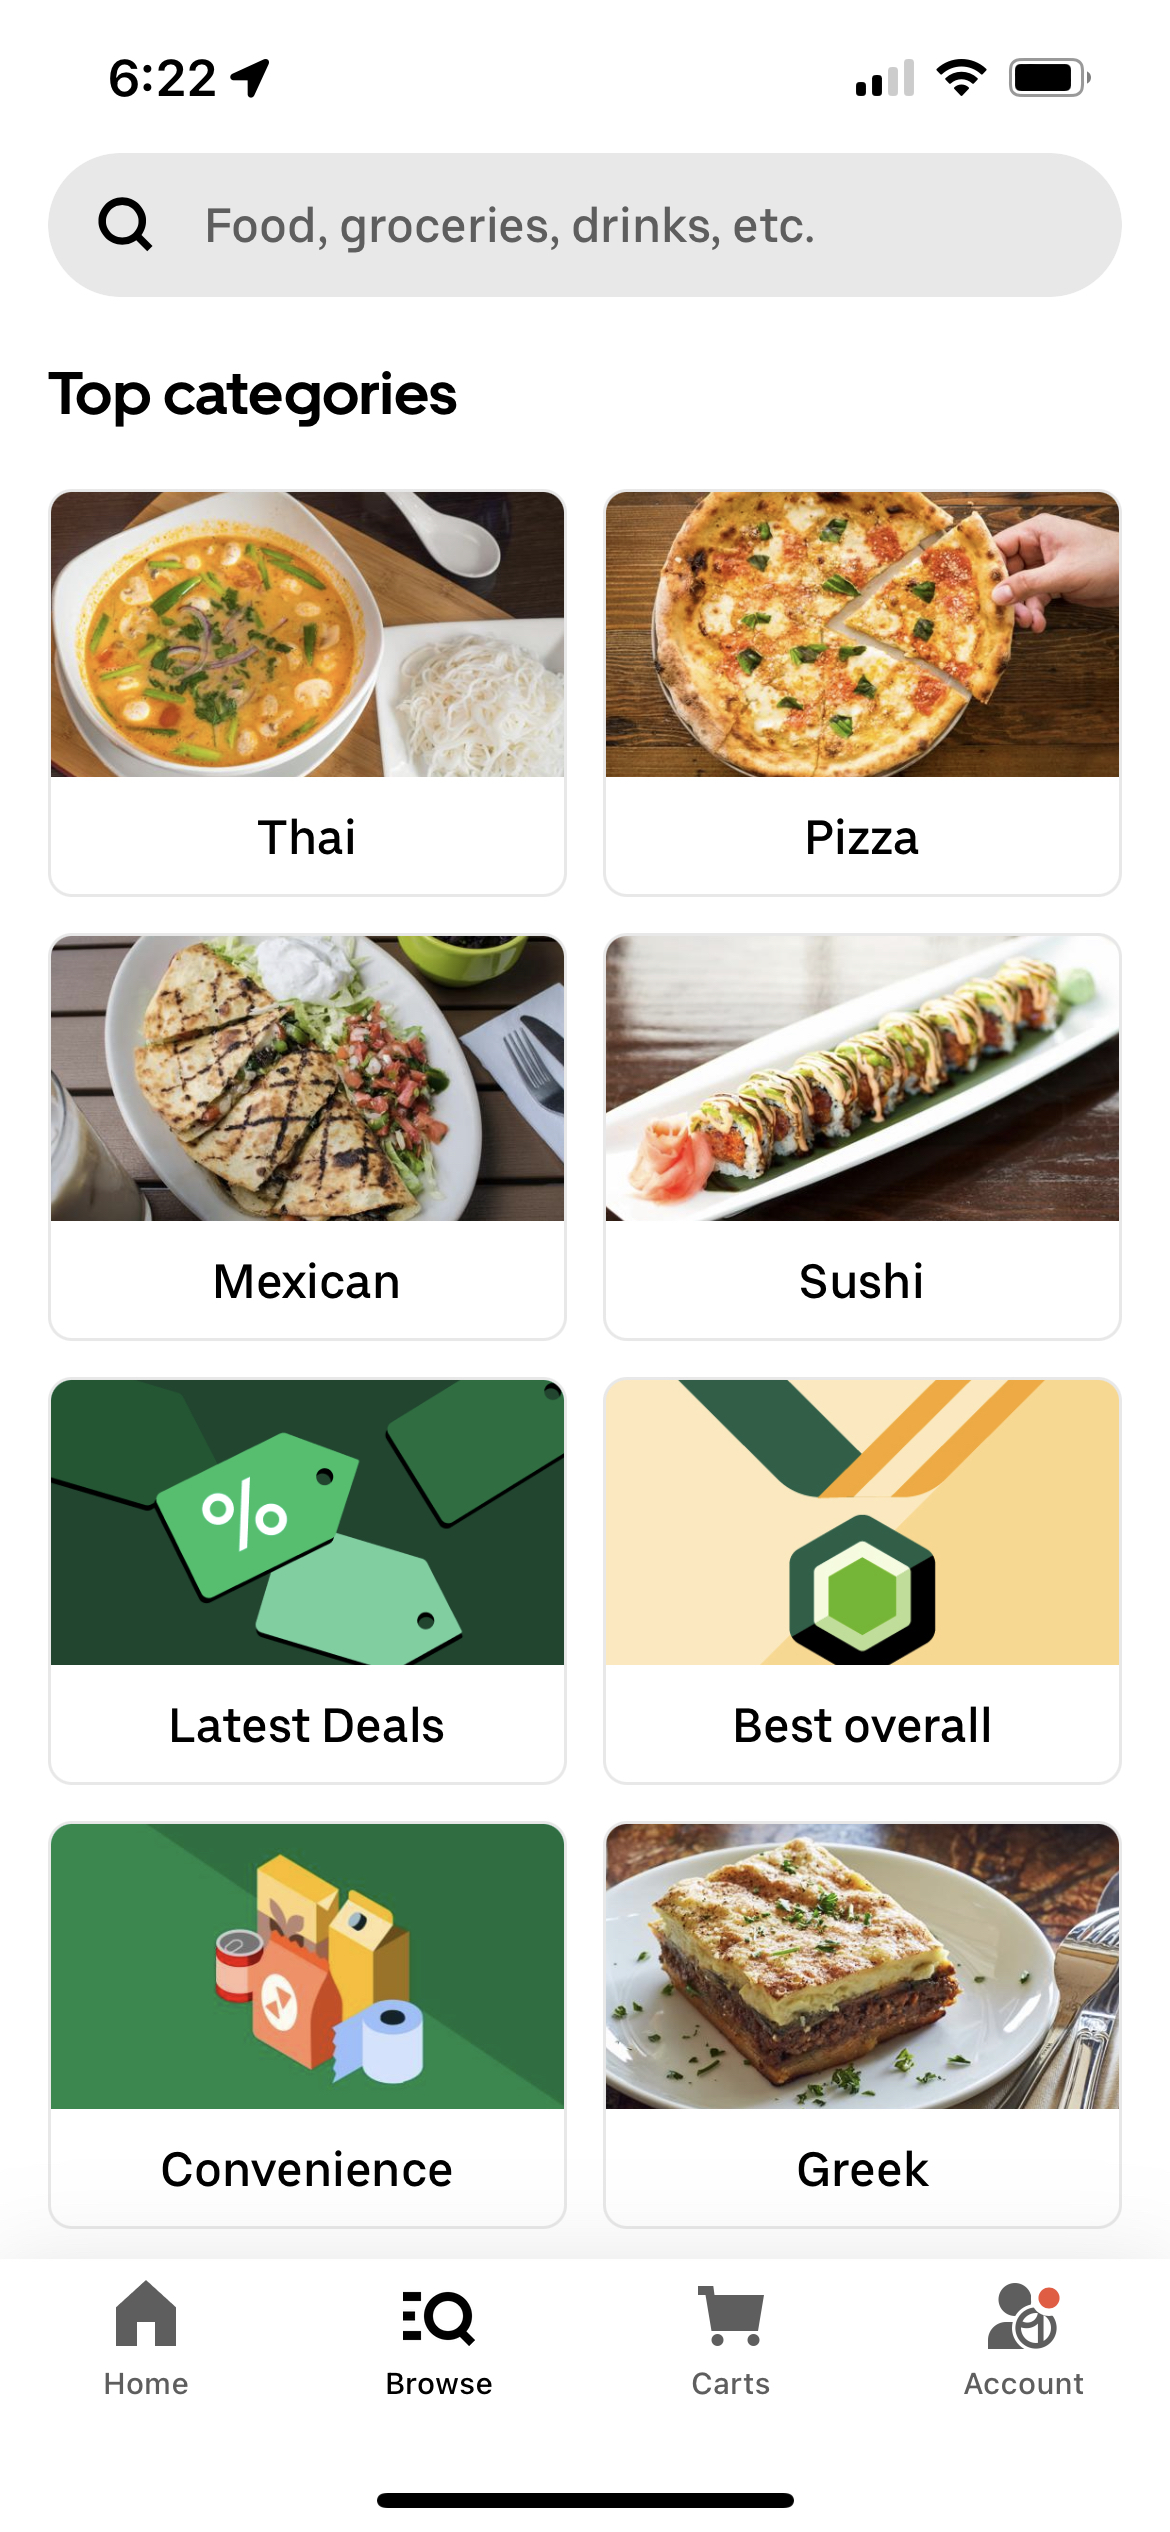